In [82]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [73]:
df = pd.read_csv("results_data.csv")

In [74]:
df.head()

,split_percentage,run,epoch,loss,train,valid,test,key
0,20,01,01,1.3863,0.00,0.00,0.01,Hits@10
1,20,01,01,1.3863,0.01,0.01,0.01,Hits@20
2,20,01,01,1.3863,0.01,0.01,0.01,Hits@30
3,20,01,02,1.3861,0.09,0.04,0.02,Hits@10
4,20,01,02,1.3861,0.27,0.15,0.03,Hits@20


In [106]:
df = df[df.loss != 'loss']
print(df.loc[df['loss'] == 'loss'])

Empty DataFrame
Columns: [split_percentage, run, epoch, loss, train, valid, test, key]
Index: []


In [107]:
df[["loss", "train","valid","test"]] = df[["loss", "train","valid","test"]].apply(pd.to_numeric)

/home/rasta/development/ryerson-msc/machine-learning/final-project/ryerson-ml-final-project-fall-2021/venv/lib/python3.8/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [108]:
df[["loss", "train","valid","test"]].astype('float').dtypes

loss     float64
train    float64
valid    float64
test     float64
dtype: object

In [119]:
pd.set_option('display.max_rows', None)

In [123]:
df_group =df.groupby(['run','split_percentage']).mean()

In [128]:
pd.DataFrame(df_group.to_records())

,run,split_percentage,loss,train,valid,test
0,01,20,0.744421,6.899583,6.294900,4.364833
1,01,40,0.640372,9.875867,9.148633,6.596467
2,01,60,0.554499,15.419333,14.756867,11.444067
3,01,70,0.530750,14.594033,13.152867,8.153633
4,01,80,0.516201,17.536067,15.934567,13.050933
5,02,20,0.794682,5.989094,5.345322,4.017164
6,02,40,0.603328,9.881167,9.090033,6.448367
7,02,60,0.562208,16.917000,16.229833,11.991200
8,02,70,0.532606,18.243933,16.945767,14.070467
9,02,80,0.526153,17.849933,16.351533,14.596833


/home/rasta/development/ryerson-msc/machine-learning/final-project/ryerson-ml-final-project-fall-2021/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


TypeError: Neither the `x` nor `y` variable appears to be numeric.

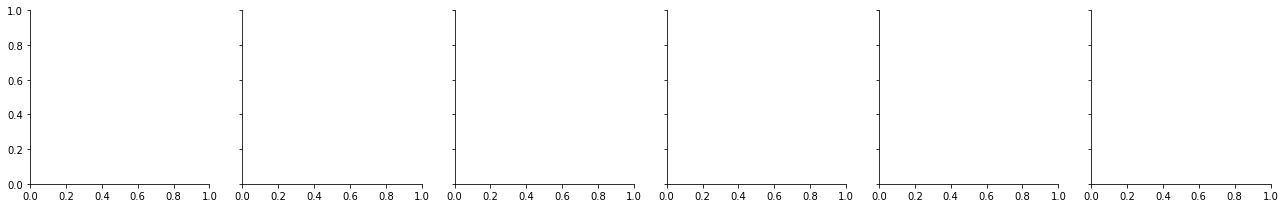

In [83]:
g = sns.FacetGrid(df, col="split_percentage")
g.map(sns.pointplot, "epoch", "train", alpha=.7)
g.add_legend()